# Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visiual data. Such as the camera of a self-driving car recognizing the car in front

## Get the Data

<a href="https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip">Food101 Dataset(Modified only pizza and steak)</a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data 

In [9]:
import os

# Walk through pizza_steak/train and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [10]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    print(f"Image shape: {img.shape}")
    plt.imshow(img)
    return img

Image shape: (382, 512, 3)


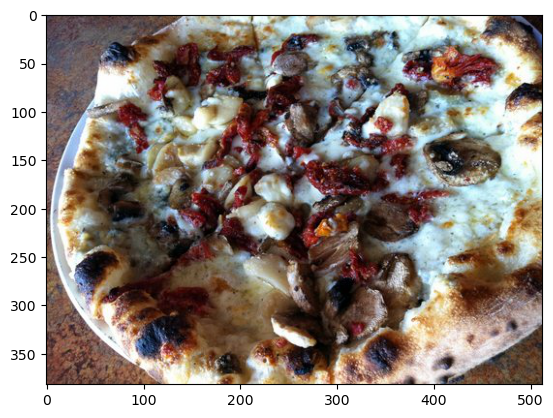

In [33]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [35]:
img/255

array([[[0.19215686, 0.19215686, 0.3254902 ],
        [0.20392157, 0.2       , 0.3254902 ],
        [0.21568627, 0.20392157, 0.3254902 ],
        ...,
        [0.07843137, 0.05490196, 0.00784314],
        [0.08235294, 0.05882353, 0.01176471],
        [0.09803922, 0.0745098 , 0.01960784]],

       [[0.22352941, 0.21960784, 0.34117647],
        [0.23137255, 0.22745098, 0.34901961],
        [0.25490196, 0.24313725, 0.35686275],
        ...,
        [0.08627451, 0.05882353, 0.02745098],
        [0.08627451, 0.05882353, 0.01960784],
        [0.08235294, 0.05490196, 0.01568627]],

       [[0.27843137, 0.27058824, 0.36470588],
        [0.2627451 , 0.25490196, 0.34901961],
        [0.2745098 , 0.25882353, 0.34901961],
        ...,
        [0.09803922, 0.06666667, 0.05490196],
        [0.09803922, 0.06666667, 0.05490196],
        [0.0745098 , 0.04313725, 0.03137255]],

       ...,

       [[0.39607843, 0.23921569, 0.2       ],
        [0.45490196, 0.29803922, 0.25882353],
        [0.43529412, 0

## An end-to-end example

Let's build a convolutional neural network to find our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir  = "pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
                        


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 384ms/step - loss: 0.5884 - accuracy: 0.6513 - val_loss: 0.3761 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4387 - accuracy: 0.8027 - val_loss: 0.3282 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4067 - accuracy: 0.8260 - val_loss: 0.3220 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3750 - accuracy: 0.8387 - val_loss: 0.2913 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3221 - accuracy: 0.8680 - val_loss: 0.3311 - val_accuracy: 0.8700


>🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU 

In [3]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Let's try non-CNN model

In [4]:
tf.random.set_seed(42)

# Create a model 

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 119ms/step - loss: 0.7239 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.4833 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [5]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model?2 performs terribly... let's try to improve it

In [6]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 118ms/step - loss: 3.2487 - accuracy: 0.6453 - val_loss: 1.7546 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 1.1166 - accuracy: 0.7007 - val_loss: 0.8703 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.8470 - accuracy: 0.7007 - val_loss: 1.5553 - val_accuracy: 0.6320
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.9036 - accuracy: 0.7127 - val_loss: 1.9568 - val_accuracy: 0.5040
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.8668 - accuracy: 0.7013 - val_loss: 0.5792 - val_accuracy: 0.7060


In [7]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data 
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

#

### 1. Become one with data

Image shape: (512, 512, 3)
Image shape: (341, 512, 3)


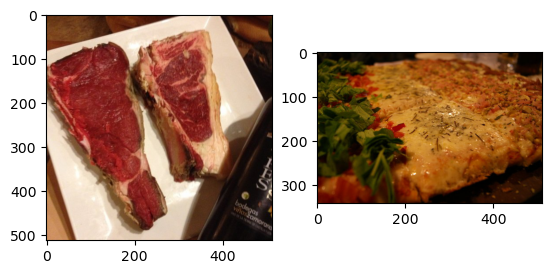

In [21]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


In [24]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary")


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of the training data batch 

images, labels = train_data.next() # get the next batch of data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Create a CNN model (start with a baseline)


In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model 
model_4 = Sequential([
    Conv2D(filters=10,
            kernel_size=3,
            strides=1,
            padding="valid", # if "same", output shape is same as input shape, if "valid" output shape is smaller than input shape
            activation="relu",
            input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification)
])

In [31]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [37]:
# Check the lenght of the training data and test data
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 117ms/step - loss: 0.8308 - accuracy: 0.7120 - val_loss: 0.5048 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4143 - accuracy: 0.8213 - val_loss: 0.3694 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.2753 - accuracy: 0.8927 - val_loss: 0.3961 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.1611 - accuracy: 0.9480 - val_loss: 0.4014 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.0633 - accuracy: 0.9860 - val_loss: 0.4251 - val_accuracy: 0.8020


In [39]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.3311 - accuracy: 0.8700


[0.33108362555503845, 0.8700000643730164]

### 5. Evaluating our model
It looks like our model is learning something, let's evaluate it.

<Axes: >

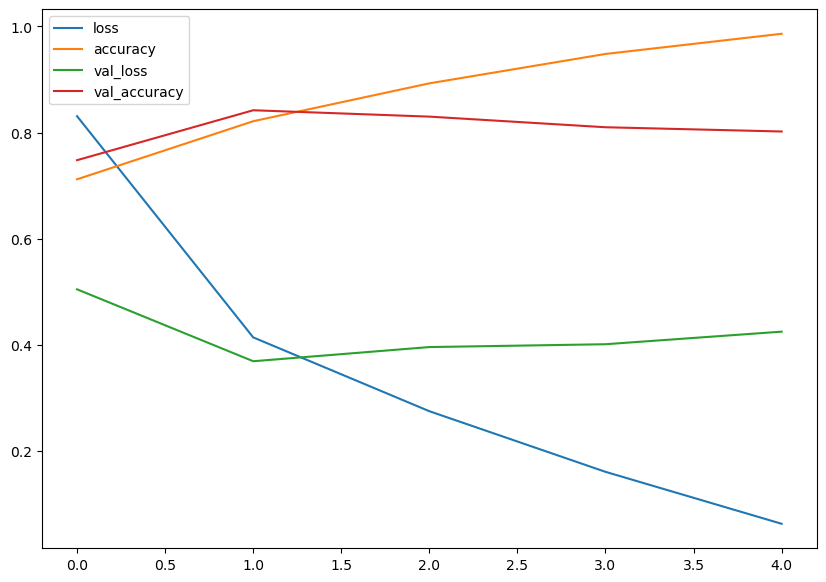

In [41]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [42]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *to well* and thus thee model's ability to generalize to unseen data will bi diminished

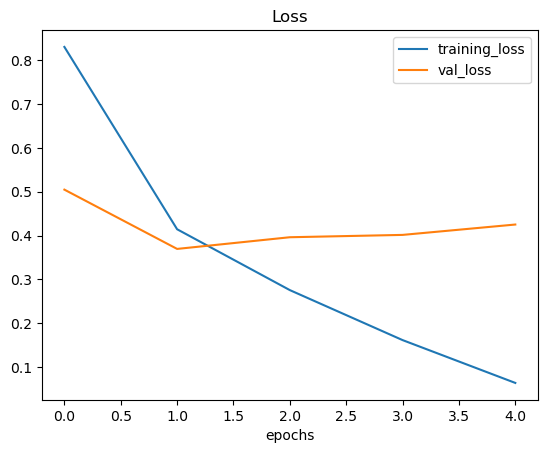

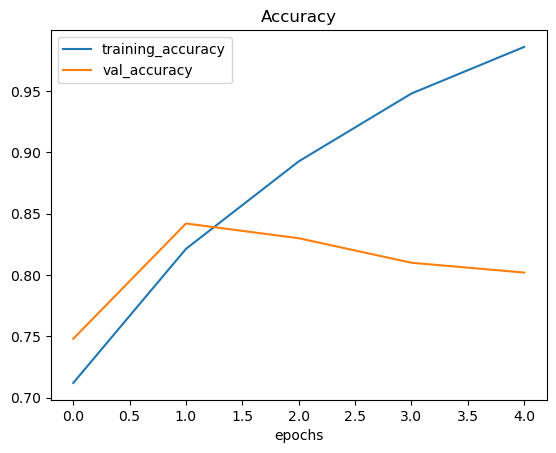

In [43]:
# Check out the loss curves of model_4

plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 step

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [44]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [45]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [46]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6153 - accuracy: 0.6600 - val_loss: 0.4643 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4489 - accuracy: 0.7953 - val_loss: 0.3986 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4278 - accuracy: 0.8033 - val_loss: 0.3538 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4080 - accuracy: 0.8113 - val_loss: 0.3383 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.3826 - accuracy: 0.8380 - val_loss: 0.3313 - val_accuracy: 0.8660


In [47]:
# Get a summary of our model
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

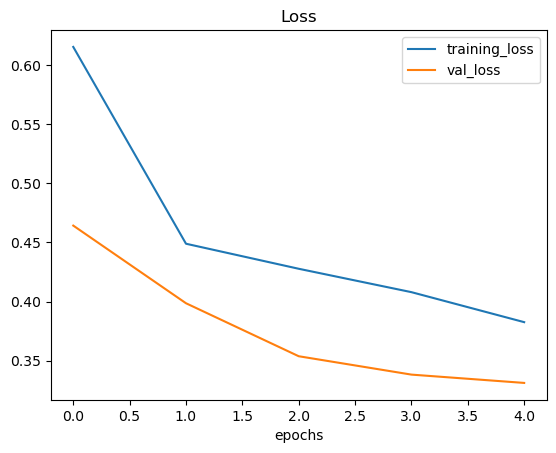

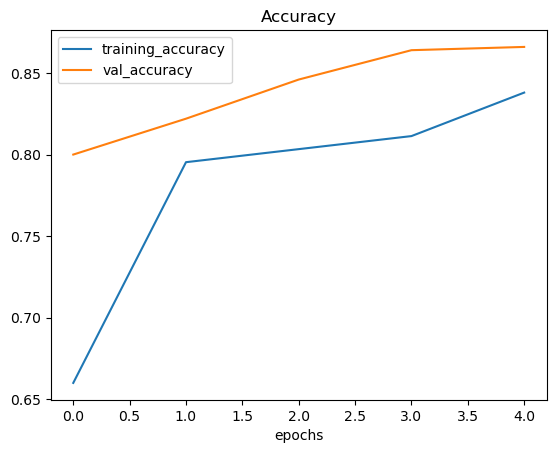

In [48]:
# Plot the loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [49]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate the image
                                             shear_range=0.2, # how much do you want to shear the image
                                             zoom_range=0.2, # how much do you want to zoom the image
                                             width_shift_range=0.2, # how much do you want to shift the image width ways
                                             height_shift_range=0.3, # how much do you want to shift the image height ways
                                             horizontal_flip=True) # do you want to flip the image horizontally

# Create ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without augmentation for the test images
test_datagen = ImageDataGenerator(rescale=1/255.)

Let's write some code to visulize data augmentation

In [50]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!

In [56]:
# Get sample data batches

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


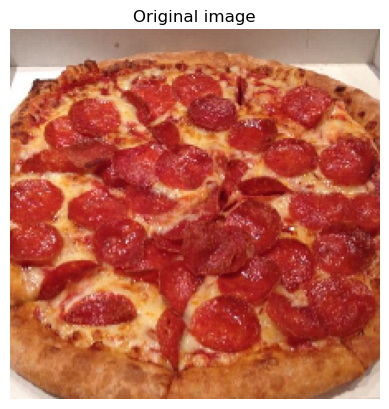

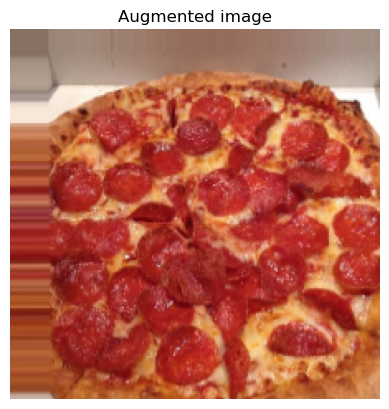

In [59]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # we've set batch size to 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now we've seen what augmented training data looks like, let's build a model and ssee how it learns.

In [60]:
# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [62]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [63]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 319ms/step - loss: 0.7538 - accuracy: 0.4320 - val_loss: 0.6920 - val_accuracy: 0.5500
Epoch 2/5
47/47 [==============================] - 14s 292ms/step - loss: 0.6984 - accuracy: 0.4927 - val_loss: 0.6886 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 14s 299ms/step - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6922 - val_accuracy: 0.5340
Epoch 4/5
47/47 [==============================] - 15s 325ms/step - loss: 0.6925 - accuracy: 0.5300 - val_loss: 0.6835 - val_accuracy: 0.6300
Epoch 5/5
47/47 [==============================] - 15s 314ms/step - loss: 0.6894 - accuracy: 0.5573 - val_loss: 0.6760 - val_accuracy: 0.5580


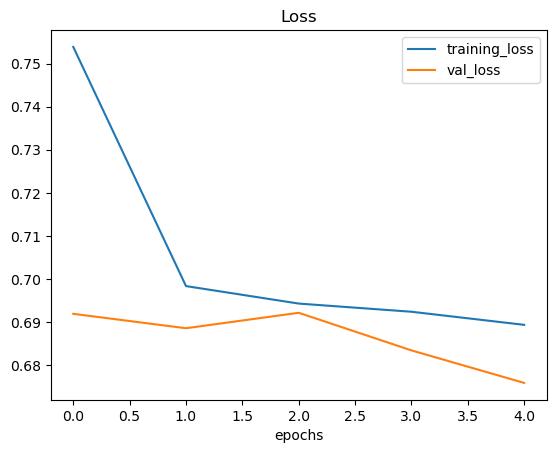

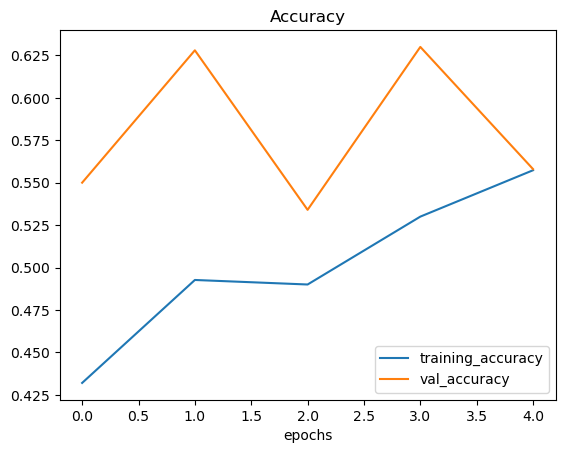

In [64]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [65]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True)
                            

Augmented training data:
Found 1500 images belonging to 2 classes.


In [66]:
# Create a model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [67]:
#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [68]:
# Fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 296ms/step - loss: 0.6368 - accuracy: 0.6280 - val_loss: 0.5508 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 14s 290ms/step - loss: 0.5478 - accuracy: 0.7247 - val_loss: 0.4168 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 14s 293ms/step - loss: 0.5172 - accuracy: 0.7480 - val_loss: 0.5370 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 14s 297ms/step - loss: 0.5259 - accuracy: 0.7260 - val_loss: 0.3841 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 14s 294ms/step - loss: 0.5051 - accuracy: 0.7540 - val_loss: 0.4351 - val_accuracy: 0.8000


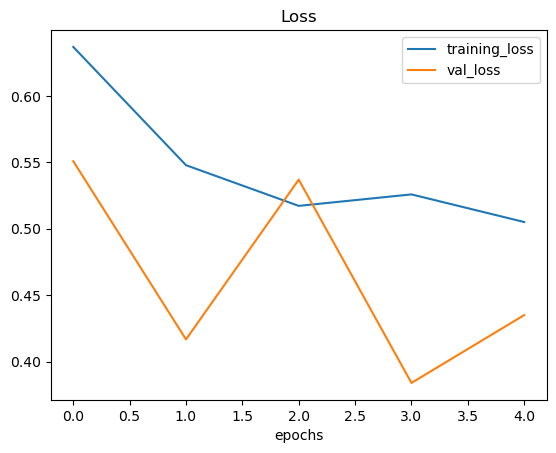

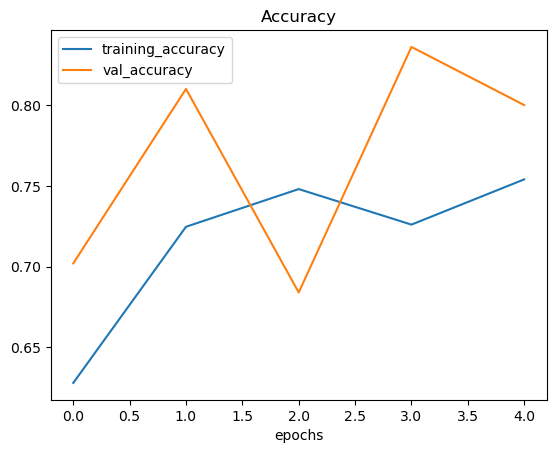

In [69]:
# Check our models training curves
plot_loss_curves(history_7)

### 7. Repead until satisfied

Since we've already beaten our baseline, there are a few things we could do to try and improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` and `MaxPool2D` layers)
* Increaste the number of filters in each convolutional layer (e.g. from 10 to 32, 64, 128, 256, etc)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data 
* Use **transfer learning** to leverage what another image model has learned and adjust it for our use case

## Making a prediction with our trained model on our own custom data

In [70]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


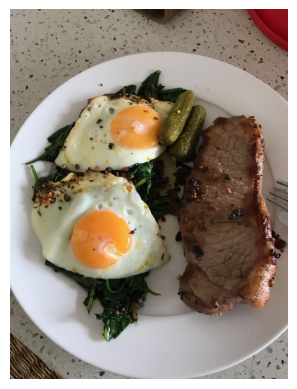

In [74]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread("steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [75]:
# Check the shape of our steak image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [82]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads in an image from filename, turns it into a tensor and reshapes into
    (224, 224, 3).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image  
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [86]:
#Load in and preprocess our custom image
steak = load_and_prep_image("steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.65049016, 0.6318627 , 0.5897058 ],
        [0.6318627 , 0.6083333 , 0.56127447],
        ...,
        [0.5215686 , 0.05098039, 0.09019607],
        [0.495098  , 0.04215686, 0.07058823],
        [0.52843136, 0.07745098, 0.10490195]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.63872546, 0.6230392 , 0.57598037],
        [0.6558823 , 0.6323529 , 0.58529407],
        ...,
        [0.53529406, 0.06862745, 0.09215686],
        [0.5299019 , 0.05931372, 0.09460784],
        [0.51421565, 0.05539215, 0.0867647 ]],

       [[0.65196073, 0.63627446, 0.58921564],
        [0.63921565, 0.6137254 , 0.56764704],
        [0.6563725 , 0.62696075, 0.5828431 ],
        ...,
        [0.53137255, 0.06470588, 0.08039215],
        [0.5274509 , 0.06862745, 0.09999999],
        [0.522549  , 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745095, 0.3102941 ],
        [0.05

In [90]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 25ms/step


array([[0.9364928]], dtype=float32)

In [89]:
# Remind ourselves of the class names
print(class_names)

['pizza' 'steak']


In [92]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [101]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 23ms/step


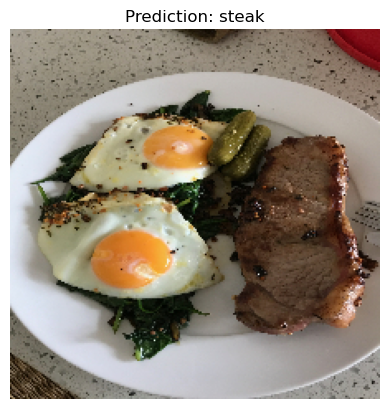

In [102]:
# Test our model on a custom image
pred_and_plot(model_7, "steak.jpeg")

Our model works! let2s try it on another image... tihs time pizza

1/1 [==============================] - 0s 22ms/step


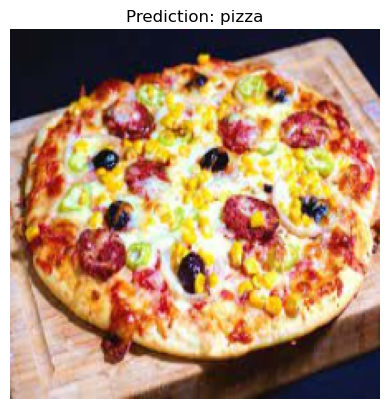

In [105]:
pred_and_plot(model_7, "pizza.jpg")